In [1]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler

import pickle

In [2]:
covid19_df = pd.read_csv("dataset/COVID19_line_list_data.csv")

In [3]:
covid19_df['death'].value_counts()

0            1022
1              42
2/23/2020       4
2/26/2020       3
2/21/2020       2
2/19/2020       2
2/25/2020       2
2/27/2020       2
2/13/2020       1
2/28/2020       1
2/24/2020       1
02/01/20        1
2/14/2020       1
2/22/2020       1
Name: death, dtype: int64

deleting the columns we dont need for our analysis

In [4]:
del covid19_df["case_in_country"]
del covid19_df['Unnamed: 3']
del covid19_df["location"]
del covid19_df["If_onset_approximated"]
del covid19_df['hosp_visit_date']
del covid19_df["source"]
del covid19_df["link"]
del covid19_df['Unnamed: 21']
del covid19_df['Unnamed: 22']
del covid19_df['Unnamed: 23']
del covid19_df['Unnamed: 24']
del covid19_df['Unnamed: 25']
del covid19_df['Unnamed: 26']
del covid19_df["summary"]
del covid19_df["exposure_end"]
del covid19_df["exposure_start"]
del covid19_df["id"]

lets have a look at the symptoms und get them ready for our model

In [5]:
#codierung symptoms
covid19_df["symptom"].unique()

d = {1: True, 0: False}
res = covid19_df.join(covid19_df.pop('symptom').str.get_dummies(',').applymap(d.get))
#print(res)



In [9]:
res.columns

Index(['id', 'reporting date', 'summary', 'country', 'gender', 'age',
       'symptom_onset', 'exposure_start', 'exposure_end', 'visiting Wuhan',
       'from Wuhan', 'death', 'recovered', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       ' abdominal pain', ' chest pain', ' chill', ' cough', ' diarrhea',
       ' difficult in breathing', ' dyspnea', ' joint pain',
       ' loss of appetite', ' muscle pain', ' pneumonia', ' sputum', ' thirst',
       'fever', 'flu symptoms', 'headache', 'joint pain', 'malaise', 'nausea',
       'physical discomfort', 'runny nose', 'sore body', 'throat pain',
       'tired', 'vomiting'],
      dtype='object')

In [7]:

# Merge same sympthoms

res['malaise'][res[' malaise']==True]=True
res['nausea'][res[' nausea']==True]=True

res[' cough'][res[' coughing'] == True] = True
res[' cough'][res['cough'] == True] = True
res[' cough'][res['mild cough'] == True] = True
res[' cough'][res['cough with sputum'] == True] = True

res[' chill'][res[' chills'] == True] = True
res[' chill'][res[' cold'] == True] = True
res[' chill'][res['chills'] == True] = True
res[' chill'][res['cold'] == True] = True

res[' cough'][res[' coughing'] == True] = True

res[' muscle pain'][res[' myalgia'] == True] = True
res[' muscle pain'][res[' myalgias'] == True] = True
res[' muscle pain'][res[' muscle aches'] == True] = True
res[' muscle pain'][res[' muscle cramps'] == True] = True
res[' muscle pain'][res['myalgia']==True]=True
res[' muscle pain'][res[' aching muscles']==True]=True
#####noch zu löschen
res['fever'][res[' fever']==True]=True
res['fever'][res['feaver']==True]=True
res['fever'][res['feve\\']==True]=True
res['fever'][res['fever']==True]=True
res['fever'][res['high fever']==True]=True
res['fever'][res['mild fever']==True]=True

res['tired'][res[' fatigue']==True]=True
res['tired'][res['fatigue']==True]=True


res[' difficult in breathing'][res[' breathlessness']==True]=True
res[' difficult in breathing'][res[' difficulty breathing']==True]=True
res[' difficult in breathing'][res[' respiratory distress']==True]=True
res[' difficult in breathing'][res[' shortness of breath']==True]=True
res[' difficult in breathing'][res['difficulty breathing']==True]=True
res[' difficult in breathing'][res['chest discomfort']==True]=True

res['vomiting'][res['reflux']==True]=True
res['vomiting'][res[' vomiting']==True]=True

res['throat pain'][res['throat discomfort']==True]=True
res['throat pain'][res['sore throat']==True]=True
res['throat pain'][res[' throat discomfort']==True]=True
res['throat pain'][res[' sore throat']==True]=True
res['throat pain'][res[' itchy throat']==True]=True


res['flu symptoms'][res[' flu']==True]=True


res['runny nose'][res[' sneeze']==True]=True
res['runny nose'][res['sore throat']==True]=True
res['runny nose'][res[' runny nose']==True]=True
res['runny nose'][res[' nasal discharge']==True]=True


res['headache'][res[' headache']==True]=True
res['headache'][res[' heavy head']==True]=True





C:\Users\Alexandra\Anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alexandra\Anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Alexandra\Anaconda3\envs\tensorflow2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyda

In [8]:
#here were deleting the empty columns after the merge 

del res[' coughing']
del res['cough']
del res['mild cough']
del res['cough with sputum']

del res['chills']
del res['cold']
del res[' chills']
del res[' cold']

del res[' myalgia']
del res[' myalgias']
del res[' muscle aches']
del res[' muscle cramps']
del res['myalgia']
del res[' aching muscles']

del res[' headache']
del res[' heavy head']
del res[' sneeze']
del res[' sore throat']
del res[' runny nose']
del res[' flu']
del res['throat discomfort']
del res['sore throat']
del res[' throat discomfort']
del res[' itchy throat']
del res['reflux']
del res[' vomiting']
del res[' breathlessness']
del res[' difficulty breathing']
del res[' respiratory distress']
del res[' shortness of breath']
del res['difficulty breathing']
del res['chest discomfort']
del res[' fever']
del res['feaver']
del res['feve\\']
del res['high fever']
del res['mild fever']
del res[' fatigue']
del res['fatigue']

del res[' malaise']
del res[' nausea']
del res[' nasal discharge']

In [60]:
res[' cough'].value_counts()

False    968
True     117
Name:  cough, dtype: int64

In [70]:
res[' chill'].value_counts()

False    1069
True       16
Name:  chill, dtype: int64

In [10]:
#overwritting the data Frame with our dummie variables of the symptoms 
covid19_df=res

In [14]:
covid19_df.head()

,id,reporting date,country,gender,age,symptom_onset,exposure_start,exposure_end,visiting Wuhan,from Wuhan,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,1,1/20/2020,China,male,66.0,01/03/20,12/29/2019,01/04/20,1,0.0,...,False,False,False,False,False,False,False,False,False,False
1,2,1/20/2020,China,female,56.0,1/15/2020,NaN,01/12/20,0,1.0,...,False,False,False,False,False,False,False,False,False,False
2,3,1/21/2020,China,male,46.0,01/04/20,NaN,01/03/20,0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,4,1/21/2020,China,female,60.0,NaN,NaN,NaN,1,0.0,...,False,False,False,False,False,False,False,False,False,False
4,5,1/21/2020,China,male,58.0,NaN,NaN,NaN,0,0.0,...,False,False,False,False,False,False,False,False,False,False


In [15]:
covid19_df.shape

(1085, 37)

In [16]:
#Data Cleaning 
def gender(str):
    if str == "male":
        return 0
    else:
        return 1
    
covid19_df["gender"] = covid19_df["gender"].apply(gender)

we will the one hot encoding to get our countries in shape for the analysis 

In [17]:
def location(str):
    if str == "Afghanistan":
        return 1
    elif str == "Algeria":
        return 2
    elif str == "Australia":
        return 3
    elif str == "Austria":
        return 4
    elif str == "Cambodia":
        return 5
    elif str == "Bahrain":
        return 6
    elif str == "Belgium":
        return 7
    elif str == "Canada":
        return 8
    elif str == "China":
        return 9
    elif str == "Croatia":
        return 10
    elif str == "Egypt":
        return 11
    elif str == "France":
        return 12
    elif str == "Germany":
        return 13
    elif str == "Hong Kong":
        return 14
    elif str == "India":
        return 15
    elif str == "Israel":
        return 16
    elif str == "Iran":
        return 17
    elif str == "Italy":
        return 18
    elif str == "Kuwait":
        return 19
    elif str == "Japan":
        return 20
    elif str == "Lebanon":
        return 21
    elif str == "Malaysia":
        return 22
    elif str == "Nepal":
        return 23
    elif str == "Phillipines":
        return 24
    elif str == "Russia":
        return 25
    elif str == "Singapore":
        return 26
    elif str == "Spain":
        return 27
    elif str == "Sri Lanka":
        return 28
    elif str == "South Korea":
        return 29
    elif str == "Switzerland":
        return 30
    elif str == "Taiwan":
        return 31
    elif str == "Thailand":
        return 32
    elif str == "UAE":
        return 33
    elif str == "UK":
        return 34
    elif str == "USA":
        return 35
    elif str == "Finland":
        return 36
    else:
        return 37

In [18]:
covid19_df["country"] = covid19_df["country"].apply(location)

In [11]:
#lets have a look at the data: data analysis

In [19]:
#Distribution by location

locs = np.array(covid19_df.country)
print(np.unique(locs))
# 38 different Locations

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37]


Text(0, 0.5, 'Age')

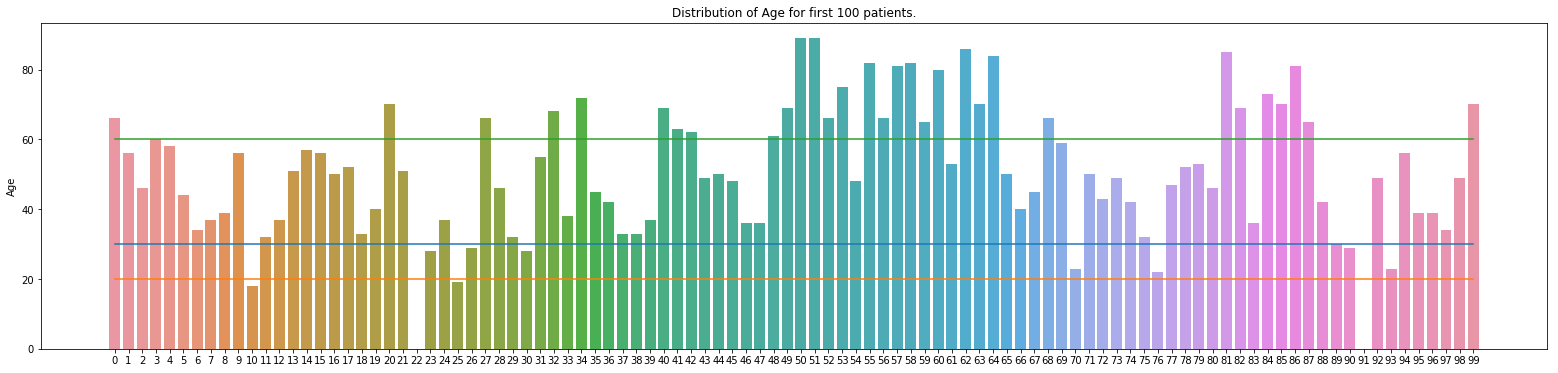

In [19]:
#Age
a = [30 for i in range(100)]
b = [20 for i in range(100)]
c = [60 for i in range(100)]
plt.figure(figsize=(27,6))

plt.title("Distribution of Age for first 100 patients.")
sns.barplot(x=covid19_df.index[:100], y=covid19_df['age'][:100])

plt.plot(a)
plt.plot(b)
plt.plot(c)
plt.ylabel("Age")

Text(0, 0.5, 'Age')

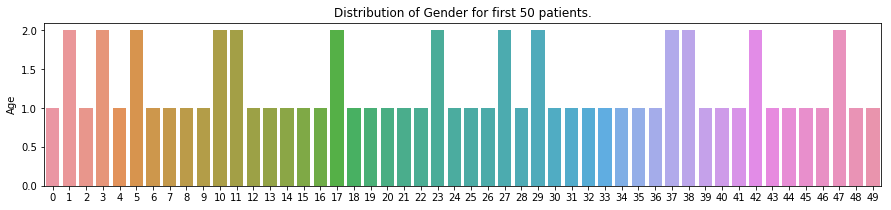

In [16]:
#Gender 
plt.figure(figsize=(15,3))

plt.title("Distribution of Gender for first 50 patients.")
sns.barplot(x=covid19_df.index[:50], y=covid19_df['gender'][:50])

plt.ylabel("Age")

In [21]:
#dates
covid19_df["reporting date"].fillna("1/21/2020", inplace = True)

In [22]:
def dates(a):
    li = a.split('/')
    x1 = float(li[0])
    x2 = float(li[1])
    ans = (x1 * (x2 ** 2)) ** 0.5
    return ans

In [23]:
covid19_df['reporting date']= covid19_df['reporting date'].apply(dates)

Text(0, 0.5, '1 : Visited Wuhan')

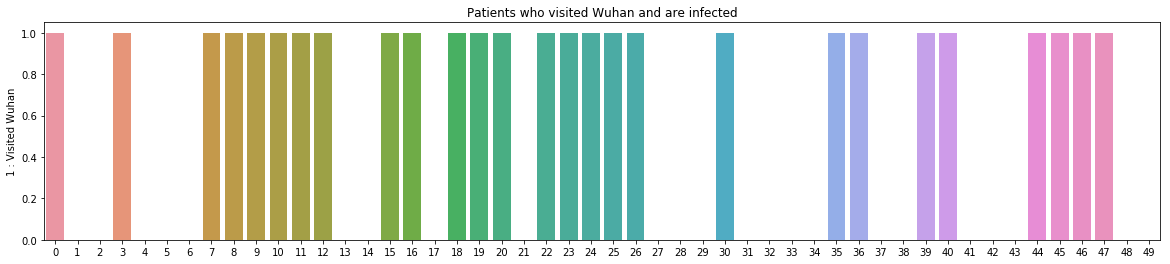

In [21]:
#Is Wuhan the factor for chinese Citizens? 
plt.figure(figsize=(20,4))

plt.title("Patients who visited Wuhan and are infected")
sns.barplot(x=covid19_df.index[:50], y=covid19_df['visiting Wuhan'][:50])

plt.ylabel("1 : Visited Wuhan")

Text(0, 0.5, '1 : From Wuhan')

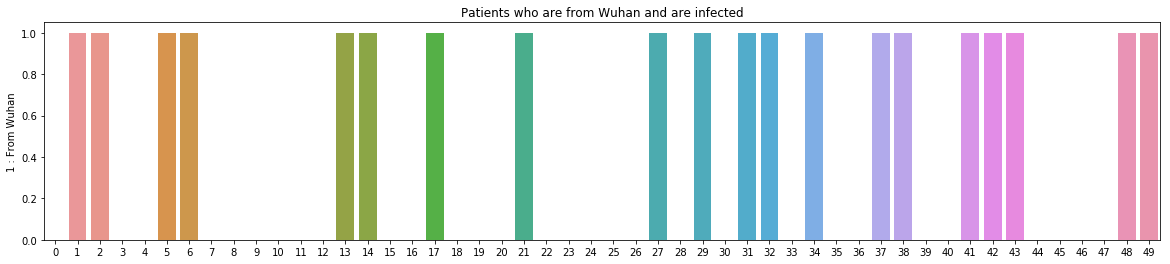

In [22]:
plt.figure(figsize=(20,4))

plt.title("Patients who are from Wuhan and are infected")
sns.barplot(x=covid19_df.index[:50], y=covid19_df['from Wuhan'][:50])

plt.ylabel("1 : From Wuhan")

In [22]:
#final data preparation: 

In [24]:
covid19_df.reset_index(inplace = True) 
covid19_df.head()

,index,id,reporting date,country,gender,age,symptom_onset,visiting Wuhan,from Wuhan,death,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,0,1,20.0,9,0,66.0,01/03/20,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,2,20.0,9,1,56.0,1/15/2020,0,1.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,3,21.0,9,0,46.0,01/04/20,0,1.0,0,...,False,False,False,False,False,False,False,False,False,False
3,3,4,21.0,9,1,60.0,NaN,1,0.0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,5,21.0,9,0,58.0,NaN,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False


In [26]:
covid19_df['age'].value_counts()

55.0    72
65.0    52
45.0    39
75.0    37
35.0    36
        ..
1.0      1
0.5      1
87.0     1
84.0     1
91.0     1
Name: age, Length: 85, dtype: int64

In [27]:
covid19_df["reporting date"].fillna(0, inplace = True)
covid19_df["country"].fillna(9, inplace = True)
covid19_df["age"].fillna(45, inplace = True)
covid19_df["from Wuhan"].fillna(1, inplace = True)
covid19_df["visiting Wuhan"].fillna(1, inplace = True)
covid19_df["death"].fillna(1, inplace = True)
covid19_df["recovered"].fillna(1, inplace = True)

In [26]:
#covid19_df["Age_Gender"] = covid19_df["age"]*covid19_df["gender"]

In [28]:
covid19_df.head()

,index,reporting date,country,gender,age,symptom_onset,visiting Wuhan,from Wuhan,death,recovered,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,0,20.0,9,0,66.0,01/03/20,1,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,20.0,9,1,56.0,1/15/2020,0,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,21.0,9,0,46.0,01/04/20,0,1.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,3,21.0,9,1,60.0,NaN,1,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,4,21.0,9,0,58.0,NaN,0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
def change(str):
    if str == '0':
        return 0
    elif str == '1':
        return 1
    else:
        return 

In [30]:
covid19_df["death"] = covid19_df["death"].apply(change)

In [31]:
covid19_df["recovered"] = covid19_df["recovered"].apply(change)

In [32]:
covid19_df.columns

Index(['index', 'reporting date', 'country', 'gender', 'age', 'symptom_onset',
       'visiting Wuhan', 'from Wuhan', 'death', 'recovered', ' abdominal pain',
       ' chest pain', ' chill', ' cough', ' diarrhea',
       ' difficult in breathing', ' dyspnea', ' joint pain',
       ' loss of appetite', ' muscle pain', ' pneumonia', ' sputum', ' thirst',
       'fever', 'flu symptoms', 'headache', 'joint pain', 'malaise', 'nausea',
       'physical discomfort', 'runny nose', 'sore body', 'throat pain',
       'tired', 'vomiting'],
      dtype='object')

In [33]:
covid19_df.loc[:, ' abdominal pain':'vomiting'] = covid19_df.loc[:,' abdominal pain':'vomiting'].applymap(lambda x: 1 if x==True else 0)

In [34]:
del covid19_df['symptom_onset']
covid19_df.head()

,index,reporting date,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,abdominal pain,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,0,20.0,9,0,66.0,1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20.0,9,1,56.0,0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,21.0,9,0,46.0,0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,21.0,9,1,60.0,1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,21.0,9,0,58.0,0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
covid19_df['reporting date']

0       20.000000
1       20.000000
2       21.000000
3       21.000000
4       21.000000
          ...    
1080    35.355339
1081    33.941125
1082    36.769553
1083    35.355339
1084    35.355339
Name: reporting date, Length: 1085, dtype: float64

In [36]:


Y1 = covid19_df["death"]
Y2 = covid19_df["recovered"]
covid19_df["death"]
covid19_df["recovered"]



0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1080    0.0
1081    0.0
1082    0.0
1083    0.0
1084    0.0
Name: recovered, Length: 1085, dtype: float64



Y1 = np.array(Y1)
Y2 = np.array(Y2)

for i in range(len(Y1)):
    if type(Y1[i] == str):
        Y1[i] = 1
        
for i in range(len(Y2)):
    if type(Y2[i] == str):
        Y2[i] = 1



X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y2)

scaler = MinMaxScaler(feature_range=(0,1))
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

In [37]:
#XGBoost Model: 
import pandas
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [38]:
covid19_df.head()

,index,reporting date,country,gender,age,visiting Wuhan,from Wuhan,death,recovered,abdominal pain,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,0,20.0,9,0,66.0,1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,20.0,9,1,56.0,0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,21.0,9,0,46.0,0,1.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,21.0,9,1,60.0,1,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,21.0,9,0,58.0,0,0.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X= covid19_df.drop(['death', 'recovered','index'], axis=1)
X.head()

,reporting date,country,gender,age,visiting Wuhan,from Wuhan,abdominal pain,chest pain,chill,cough,...,headache,joint pain,malaise,nausea,physical discomfort,runny nose,sore body,throat pain,tired,vomiting
0,20.0,9,0,66.0,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.0,9,1,56.0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21.0,9,0,46.0,0,1.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,21.0,9,1,60.0,1,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,21.0,9,0,58.0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# deaths
Y = covid19_df.loc[:,'death']
Y.head()

Y.value_counts()
Y = Y.apply(pd.to_numeric, errors='coerce')
Y = Y.fillna(1)
Y = Y.reset_index(drop=True)


Y.value_counts()


0.0    1022
1.0      63
Name: death, dtype: int64

In [41]:
#model with accuracy
# encode string class values as integers
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y)
#label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model = xgboost.XGBClassifier(objective='binary:logistic')
model.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 96.38%


In [49]:
#model with probability: 
# encode string class values as integers
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y)
#label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model no training data
model1 = xgboost.XGBClassifier(objective='binary:logistic')
model1.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred1 = model1.predict_proba(X_test)
predictions1 = [value for value in y_pred1]
# evaluate predictions
accuracy1 = accuracy_score(y_test, predictions1)
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [43]:
y_test.value_counts()

0.0    336
1.0     23
Name: death, dtype: int64

In [44]:
y_train.value_counts()

0.0    686
1.0     40
Name: death, dtype: int64

In [45]:
from collections import Counter

Counter(predictions).keys()

dict_keys([0.0, 1.0])

In [46]:
Counter(predictions).values()

dict_values([345, 14])

In [47]:
predictions

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [50]:
predictions1

[array([9.995105e-01, 4.895012e-04], dtype=float32),
 array([0.94154984, 0.05845018], dtype=float32),
 array([0.96861863, 0.03138134], dtype=float32),
 array([0.9932137 , 0.00678631], dtype=float32),
 array([0.9982114 , 0.00178862], dtype=float32),
 array([9.996348e-01, 3.652251e-04], dtype=float32),
 array([9.9903089e-01, 9.6912944e-04], dtype=float32),
 array([9.9950886e-01, 4.9113703e-04], dtype=float32),
 array([9.996430e-01, 3.569919e-04], dtype=float32),
 array([0.8016081 , 0.19839194], dtype=float32),
 array([0.99824965, 0.00175034], dtype=float32),
 array([0.03931296, 0.96068704], dtype=float32),
 array([0.10158557, 0.89841443], dtype=float32),
 array([9.9984133e-01, 1.5866511e-04], dtype=float32),
 array([0.9983259, 0.0016741], dtype=float32),
 array([0.99581975, 0.00418027], dtype=float32),
 array([0.9988616 , 0.00113836], dtype=float32),
 array([0.99567777, 0.00432224], dtype=float32),
 array([9.9960160e-01, 3.9838091e-04], dtype=float32),
 array([0.97867197, 0.02132805], dt

In [51]:
#with non probabilistic the results are given:
for val in y_pred:
    val.abs()

AttributeError: 'numpy.float64' object has no attribute 'abs'

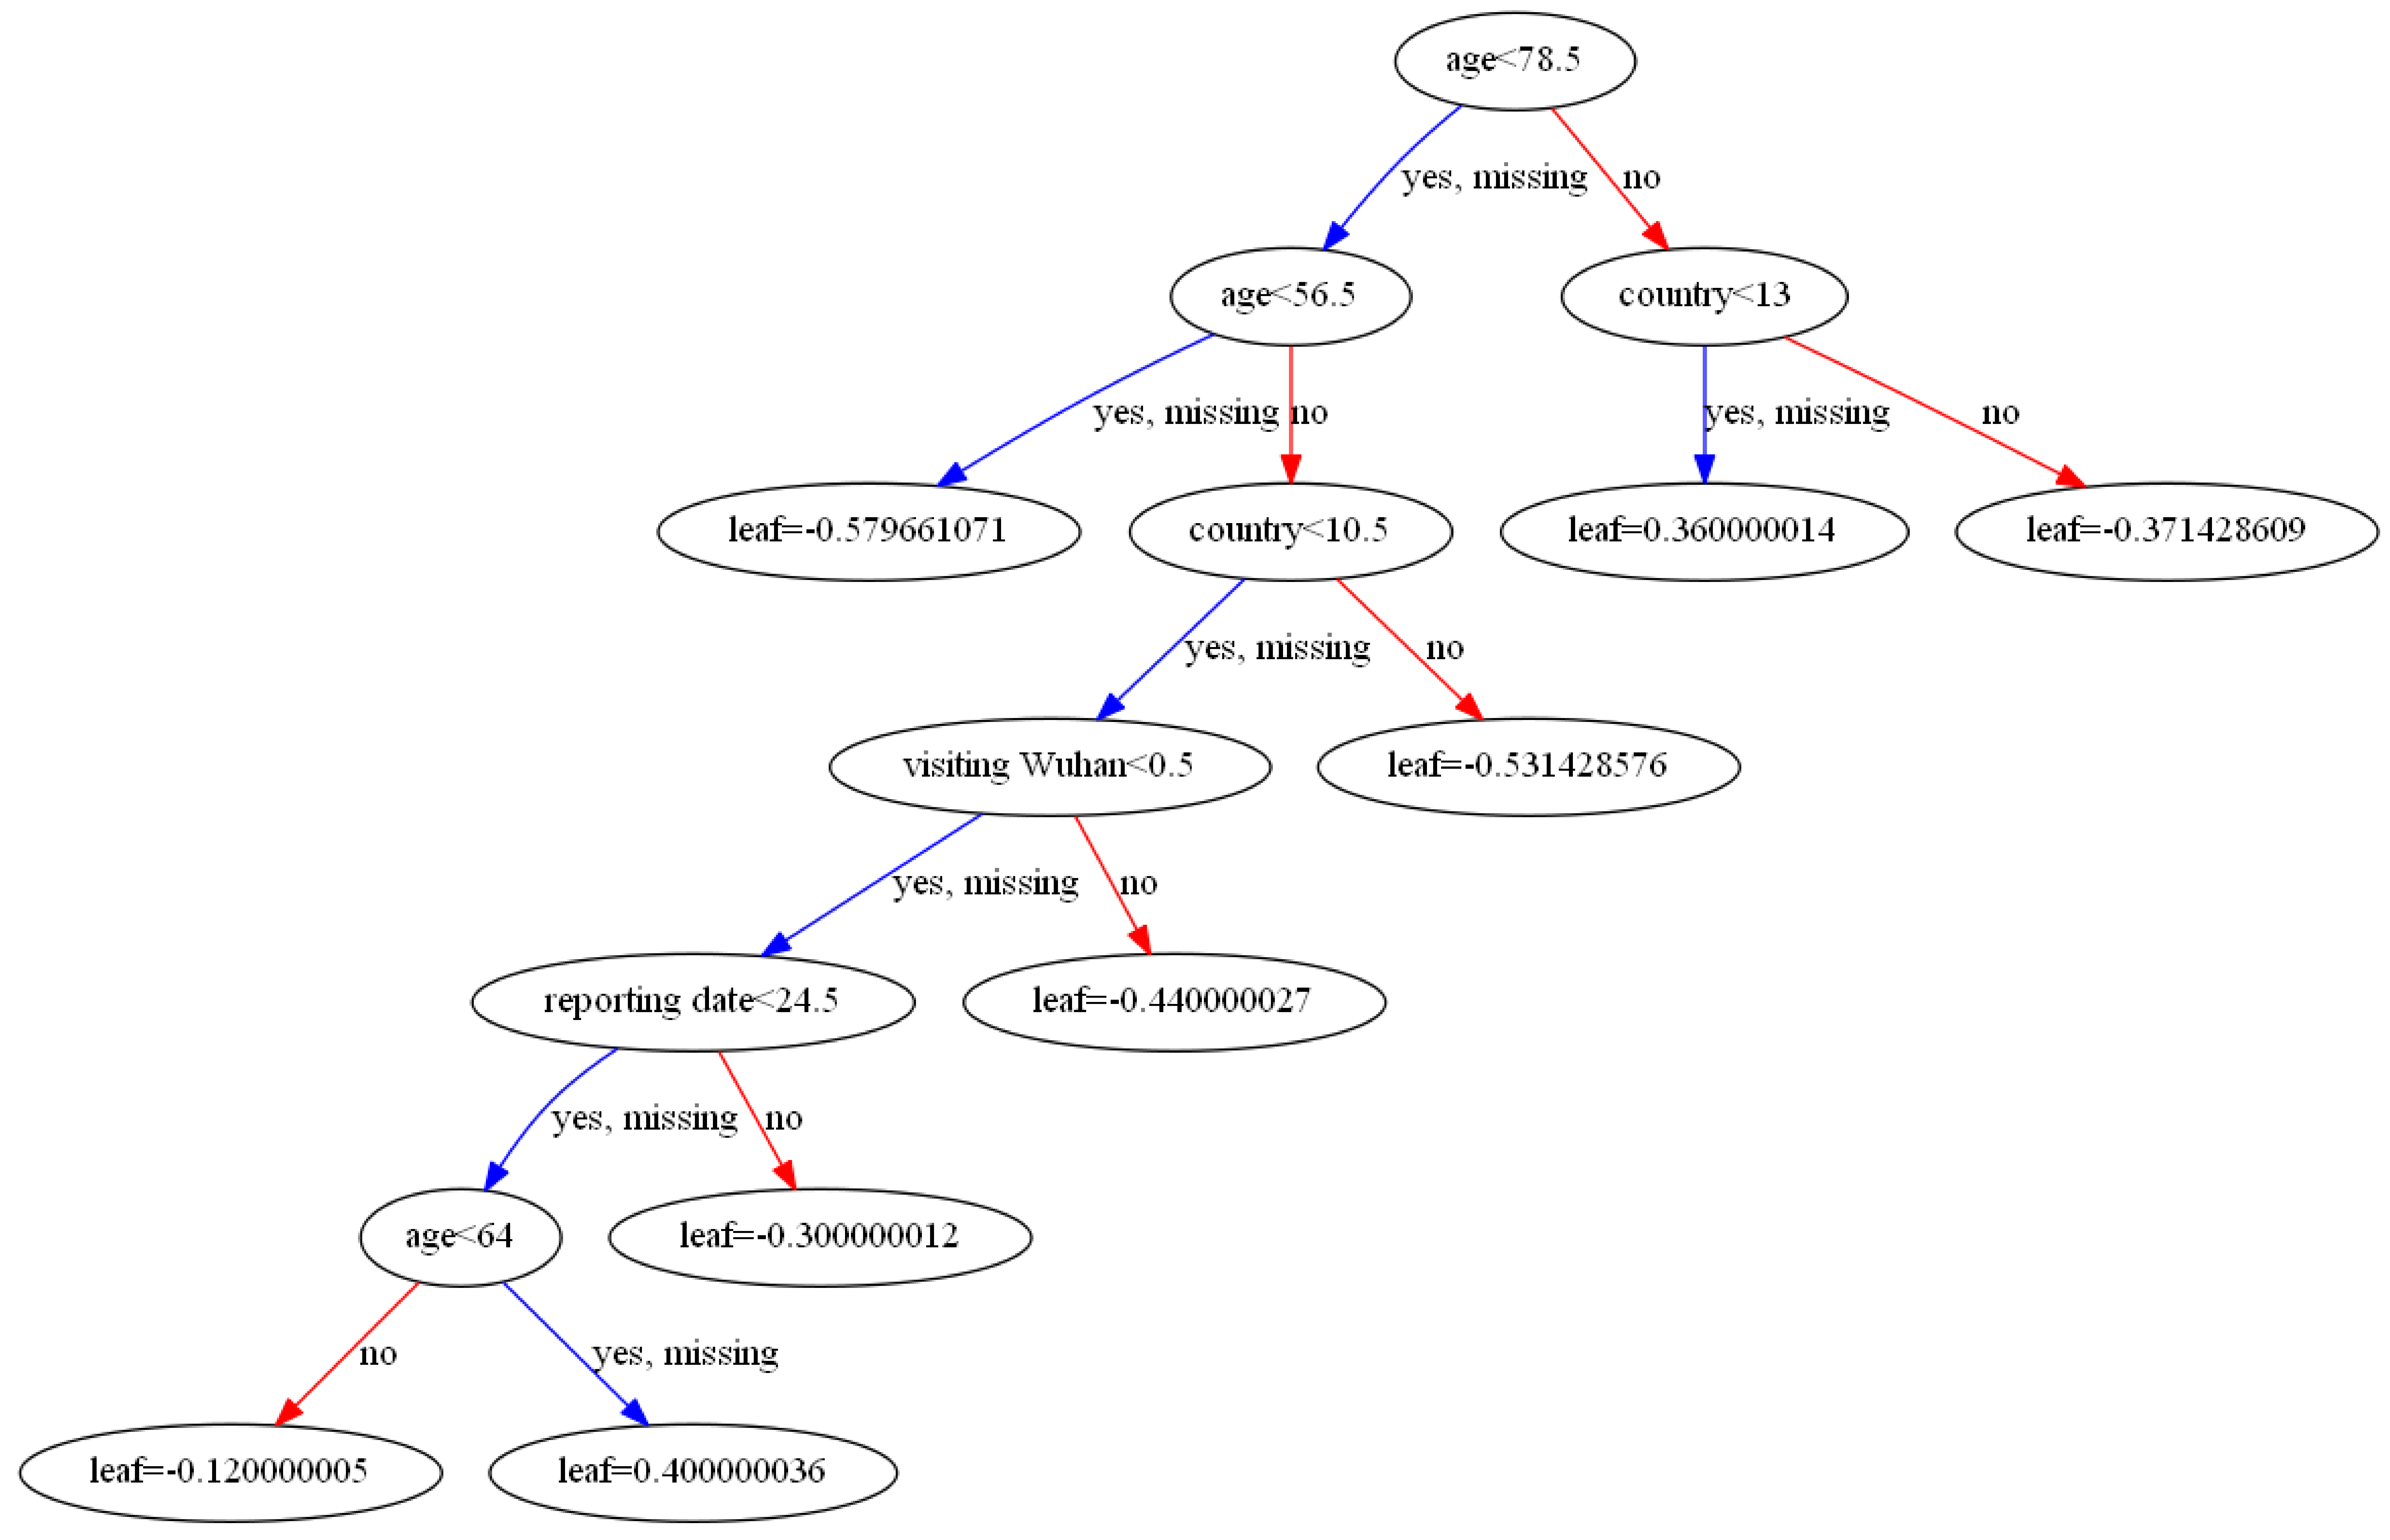

In [159]:
#Plotting out XGBoost Model: 
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
import graphviz

xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

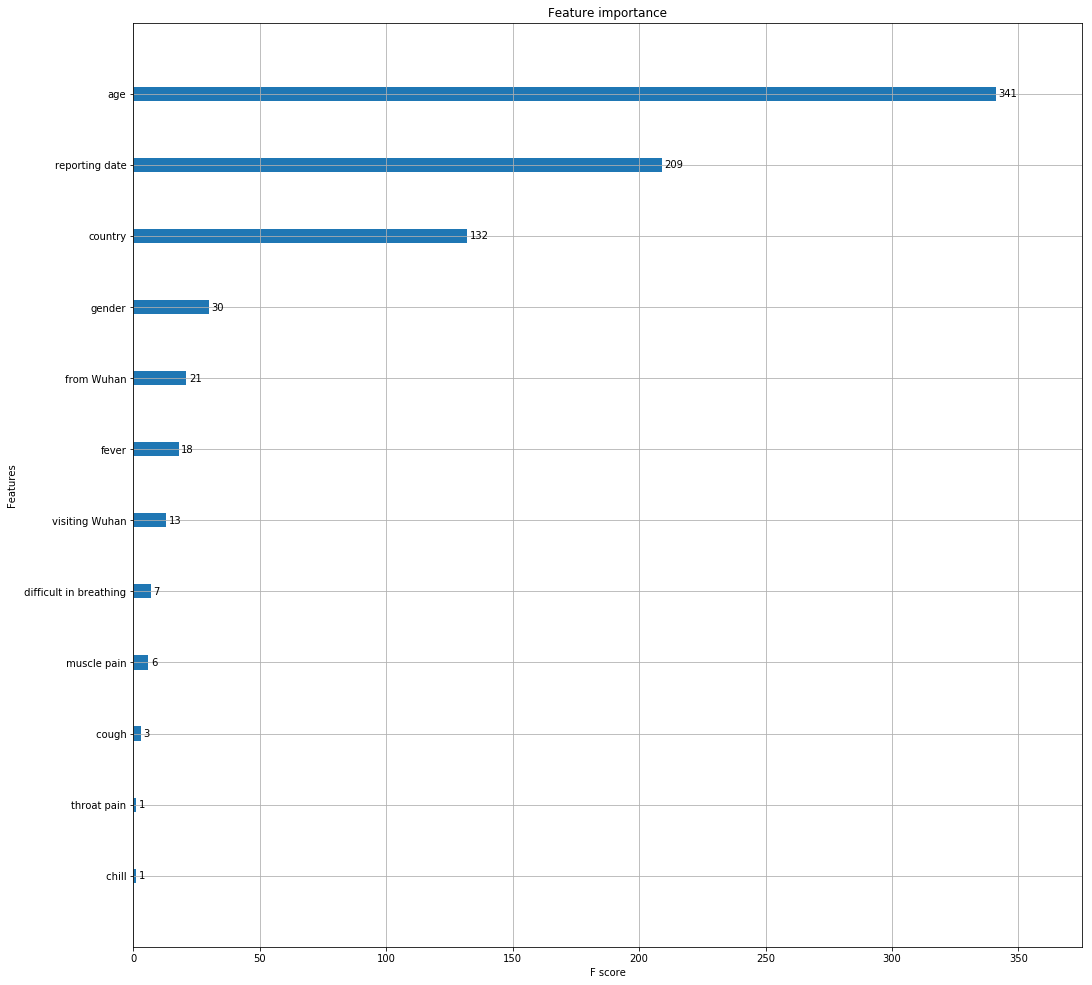

In [165]:
#plotting the variable importance
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [16, 16]
plt.show()

In [52]:
#prediction of recovery: 
#define our Y to predict the recovery: 
# deaths
Y2 = covid19_df.loc[:,'recovered']
Y2.head()

Y2.value_counts()
Y2 = Y2.apply(pd.to_numeric, errors='coerce')
Y2 = Y2.fillna(1)
Y2 = Y2.reset_index(drop=True)


Y.value_counts()



0.0    1022
1.0      63
Name: death, dtype: int64

In [53]:
#model with accuracy
# encode string class values as integers
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y)
#label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y2, test_size=test_size, random_state=seed)
# fit model no training data
model2 = xgboost.XGBClassifier(objective='binary:logistic')
model2.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred2 = model2.predict(X_test)
predictions2 = [round(value) for value in y_pred]
# evaluate predictions
accuracy2 = accuracy_score(y_test, predictions2)
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))             

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 80.78%


In [54]:
#model with probability: 
# encode string class values as integers
#label_encoder = LabelEncoder()
#label_encoder = label_encoder.fit(Y)
#label_encoded_y = label_encoder.transform(Y)
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y2, test_size=test_size, random_state=seed)
# fit model no training data
model21 = xgboost.XGBClassifier(objective='binary:logistic')
model21.fit(X_train, y_train)
print(model)
# make predictions for test data
y_pred21 = model21.predict_proba(X_test)
predictions21 = [value for value in y_pred]
# evaluate predictions
accuracy21 = accuracy_score(y_test, predictions21)
print("Accuracy: %.2f%%" % (accuracy21 * 100.0))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)
Accuracy: 80.78%


In [58]:
#ploting the tree 
#Plotting out XGBoost Model: 
import matplotlib.pyplot as plt

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'
import graphviz

xgb.plot_tree(model2,num_trees=0)
plt.rcParams['figure.figsize'] = [600, 200]
plt.savefig('model2.png')



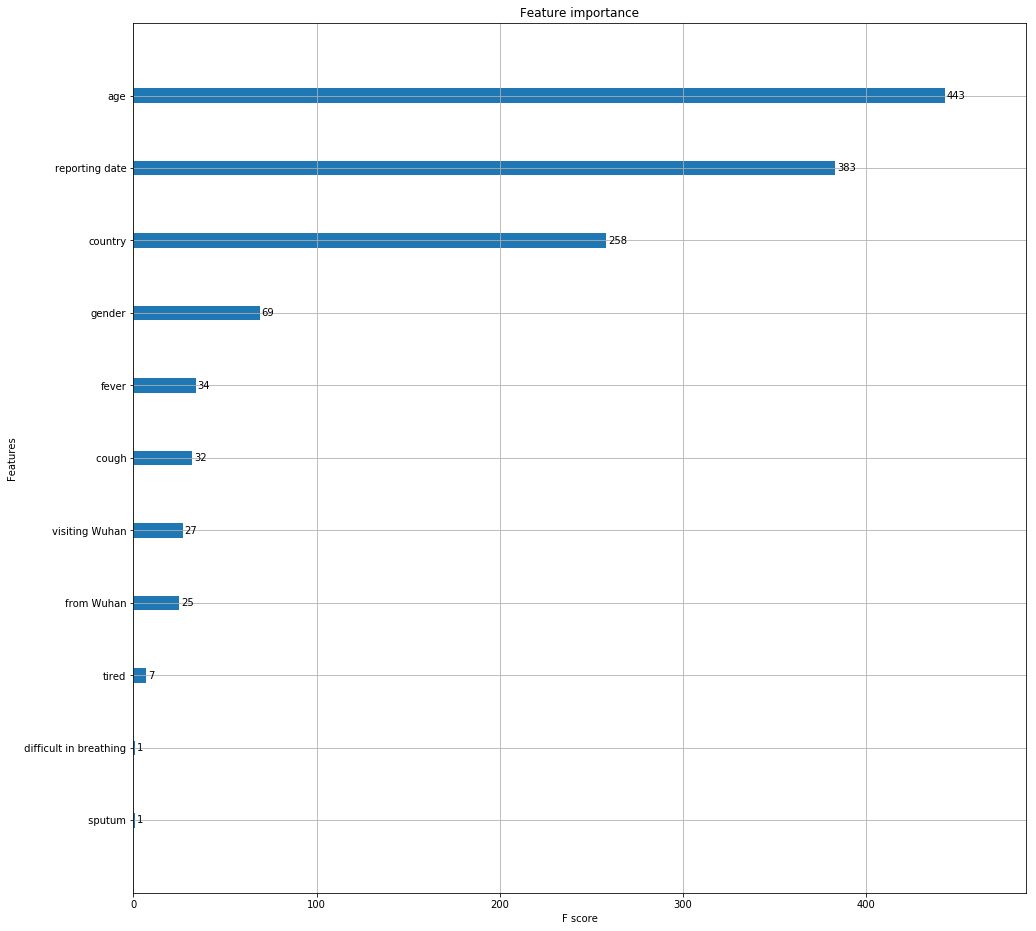

In [185]:
#plotting the variable importance

xgb.plot_importance(model2)
plt.rcParams['figure.figsize'] = [18, 18]
plt.show()

Saving our models to export them as pickle 

In [57]:
pickle.dump(model, open("pima.pickle.dat", "wb"))
pickle.dump(model1, open("pima1.pickle.dat", "wb"))
pickle.dump(model2, open("pima2.pickle.dat", "wb"))
pickle.dump(model21, open("pima21.pickle.dat", "wb"))